In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

## Лабораторная работа №3: Классификация $kNN$

[Лекция](../lectures/lecture_3/lecture_3.ipynb)

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Возможно, потребуется использовать два датасета: один для бинарной классификации, второй для многоклассовой.

2. Бинарная классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для всех последующих манипуляций.
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.
     > Далее используем нормализованные данные.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
     > Естественно, искомые результаты - улучшение метрик.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации
   
     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
      > данных - исходных данных до разбиения

     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.
   - Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

### Примечание

Один из вариантов фильтрации признаков в смысле важности (aka `feature importance`): 
- В матрице корреляции $M_{corr}$ занулить элементы главной диагонали.
- Задать значение порога $T_{corr}$ - значение корреляции одного признака с другим.
- Отфильтровать $abs(M_{corr})$ по порогу $T_{corr}$.
- Сгруппировать отфильтрованные значения по каждому признаку (вычислить сумму или среднее, например), получаем $F$ - "список фичей", - типа `Series`: индекс - название признака, значение - `feature importance`.
- Отсортировать $F$ по убыванию: $F_{sorted} = sort(F)$.
- Задать значение порога $T_{filter}$, например $T_{filter} = 0$. Можно построить график.
- $F_{sorted}[F_{sorted} > T_{filter}]$ - искомый список признаков. $F_{sorted}.index$ можно использовать для фильтрации датафрейма по признакам.

Источники:
 - [Find high correlations in a large coefficient matrix](https://stackoverflow.com/a/61956415)
 - [Returning the highest and lowest correlations from a correlation matrix in pandas](https://stackoverflow.com/a/55731198)
 - [pandas.DataFrame.lt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.lt.html)

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Описание набора данных
| № | Признак |  |
| --- | --- | --- |
| 1. | Age  | [years] |
| 2. | Sex  | [M: Male, F: Female] |
| 3. | ChestPainType  | [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| 4. | RestingBP  | [mm Hg] |
| 5. | Cholesterol | [mm/dl] |
| 6. | FastingBS | [1: if FastingBS > 120 mg/dl, 0: otherwise] |
|7. | RestingECG | [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| 8. | MaxHR | [Numeric value between 60 and 202] |
| 9. | ExerciseAngina | [Y: Yes, N: No] |
| 10. | Oldpeak | [Numeric value measured in depression] |
| 11. | ST_Slope | [Up: upsloping, Flat: flat, Down: downsloping] |
| 12. | HeartDisease | [1: heart disease, 0: Normal] |

Загрузим набор данных

In [326]:
df = pd.read_csv("knn_data/heart.csv", sep=",")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Посмотрим на описательные статистики

In [328]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [329]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [330]:
df.duplicated().sum()

0

Закодируем категориальные переменные

In [331]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Выделим данные для обучения модели

In [332]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

Разделим данные на тренировочные и тестовые

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создадим и обучим модель. Выберем количество neighbors равное 3.

In [334]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [335]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        77
           1       0.68      0.70      0.69       107

    accuracy                           0.64       184
   macro avg       0.62      0.62      0.62       184
weighted avg       0.63      0.64      0.63       184



Классификатор работает так себе... Попробуем нормализовать данные с помощью StandardScaler и снова посмотреть на метрики.

In [336]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [337]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [338]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Ура! Метрики значительно улучшились. Выведем матрицу корреляции и попробуем избавиться от некоторых признаков.

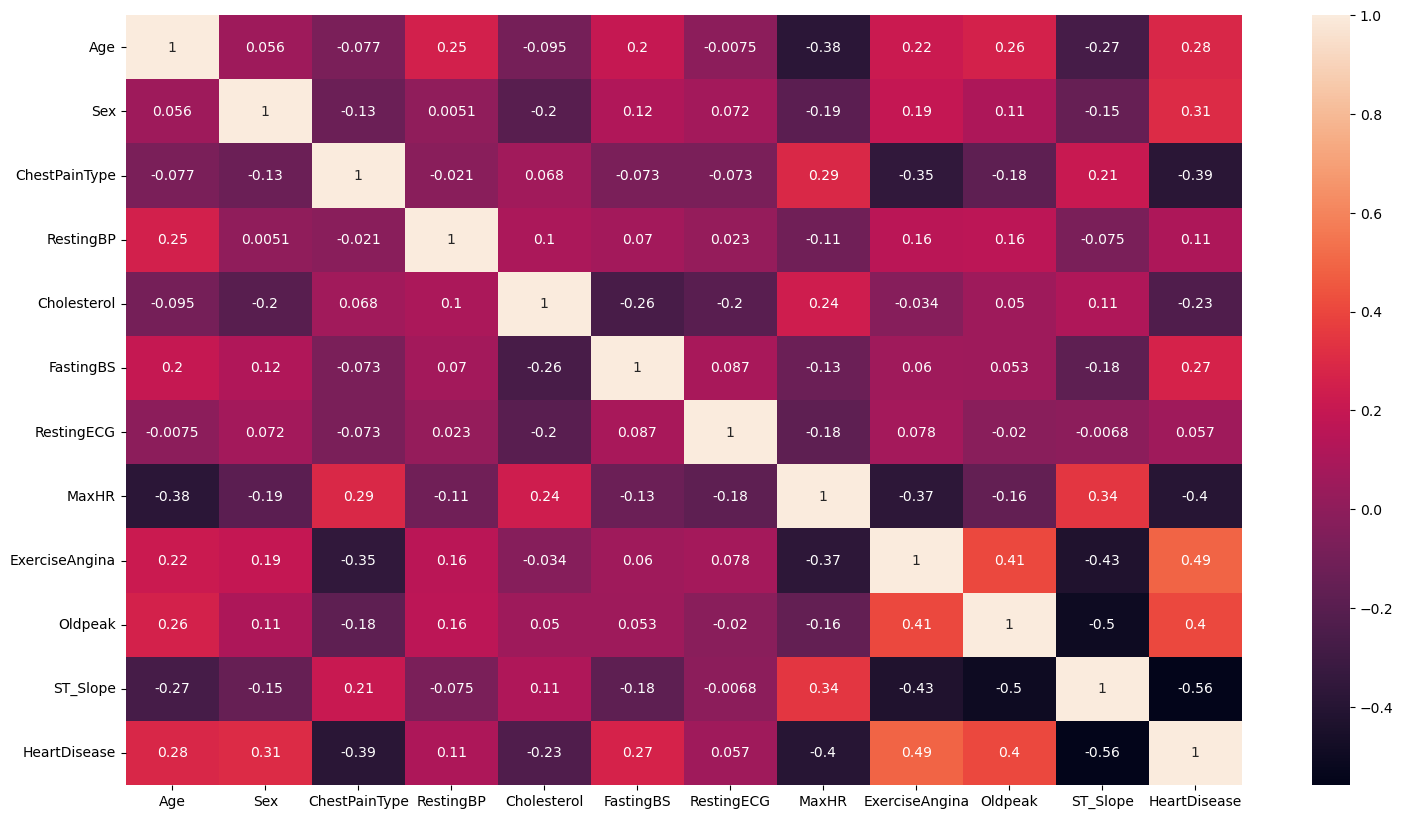

In [339]:
corr_matrix = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [340]:
X_opt = df.drop(['HeartDisease', 'RestingECG'], axis=1)
X_scaled_opt = scaler.fit_transform(X_opt)
X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_scaled_opt, y, test_size=0.2, random_state=0)

In [341]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [342]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



После удаления признака RestingECG метрики немного ухудшились. Теперь попробуем найти оптимальное значение neighbors.

In [343]:
train_scores = []
test_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled_opt, y, cv=5)
    train_scores.append(np.mean(cross_val_score(knn, X_train_opt, y_train, cv=5)))
    test_scores.append(np.mean(scores))

print(test_scores)

[0.799465431218817, 0.7689712520788786, 0.8169042527916369, 0.7995010691375624, 0.8311000237586125, 0.8092777381800904, 0.8288785934901401, 0.8169161320978855, 0.8278035162746497, 0.813649322879544, 0.8234675694939415, 0.814736279401283, 0.8332917557614635, 0.8267640769779045, 0.8311178427179853, 0.832222618199097, 0.8322107388928487, 0.8322166785459728, 0.8365645046329295]


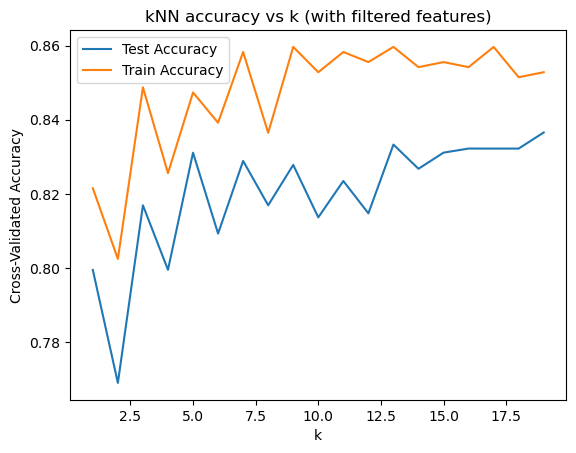

In [344]:
plt.plot(range(1, 20), test_scores, label="Test Accuracy")
plt.plot(range(1, 20), train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend();

При k равным 19 accuracy максимальна и составляет 0.83656

### Многоклассовая классификация 

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

| Признак | Описание | |
| --- | --- | --- |
| species | penguin species | (Chinstrap, Adélie, or Gentoo) |
| culmen_length_mm | culmen length | (mm) |
| culmen_depth_mm | culmen depth | (mm) |
| flipper_length_mm | flipper | length (mm) |
| body_mass_g | body mass | (g) |
| island | island name | (Dream, Torgersen, or Biscoe) |
| sex | penguin sex | |

Загрузим данные

In [365]:
df = pd.read_csv("knn_data/penguins_size.csv", sep=",")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Выведем описательные статистики

In [367]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [368]:
df.duplicated().sum()

0

Обработаем пропуски в данных

In [369]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    df[item].fillna(df[item].mean(), inplace=True)
    
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [370]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [371]:
df.sex.value_counts()

sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64

In [372]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [373]:
df.loc[336,'sex'] = 'FEMALE'
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.20000,14.10000,217.000000,4375.000000,FEMALE
335,Gentoo,Biscoe,55.10000,16.00000,230.000000,5850.000000,MALE
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,FEMALE
337,Gentoo,Biscoe,48.80000,16.20000,222.000000,6000.000000,MALE
338,Gentoo,Biscoe,47.20000,13.70000,214.000000,4925.000000,FEMALE
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo,Biscoe,49.90000,16.10000,213.000000,5400.000000,MALE


Закодируем данные

In [374]:
le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


Выделим данные для обучения

In [375]:
X = df.drop(['species'], axis=1)
y = df['species']

Нормализуем и разделим данные на тренировочные и тестовые

In [376]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

Создадим и обучим модель

In [377]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [378]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00        37

    accuracy                           0.98       104
   macro avg       0.96      0.99      0.97       104
weighted avg       0.98      0.98      0.98       104



Метрики получились довольно хорошие. Попробуем получить все метрики равные 1.

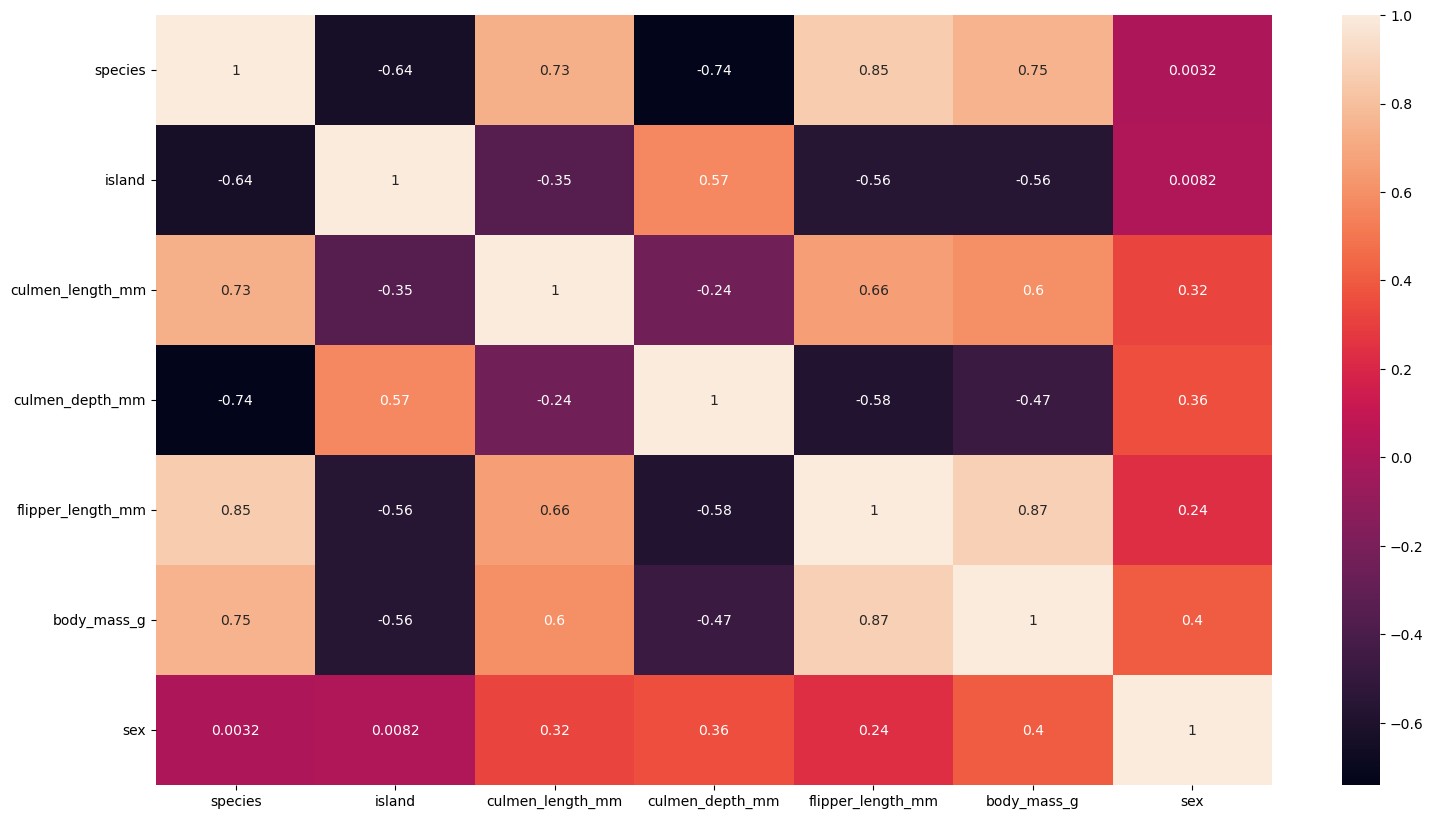

In [379]:
corr_matrix = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [387]:
X_opt = df.drop(['species', 'island'], axis=1)

In [402]:
scaler = StandardScaler()
X_scaled_opt = scaler.fit_transform(X_opt)

X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_scaled_opt, y, test_size=0.3, random_state=0)

In [403]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_opt, y_train)

KNeighborsClassifier(n_neighbors=4)

In [404]:
preds = knn.predict(X_test_opt)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



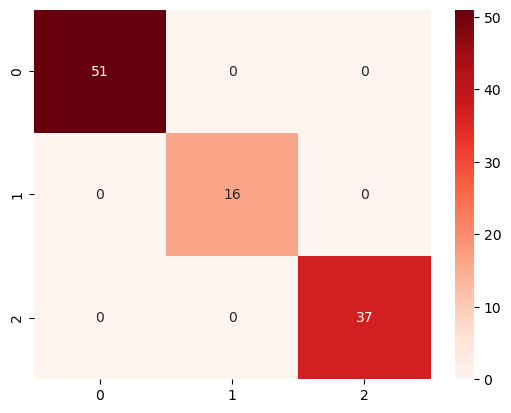

In [393]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Reds');

Ура! Все метрики равны 1. Теперь попробуем перебрать значения neighbors в некотором диапазоне и выбрать наилучшее.

In [394]:
train_scores = []
test_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled_opt, y, cv=5)
    train_scores.append(np.mean(cross_val_score(knn, X_train_opt, y_train, cv=5)))
    test_scores.append(np.mean(scores))

print(test_scores)

[0.9883631713554987, 0.9825234441602728, 0.994160272804774, 0.9883205456095482, 0.9883631713554987, 0.9883205456095482, 0.9883205456095482, 0.9883205456095482, 0.9883205456095482, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728, 0.9825234441602728]


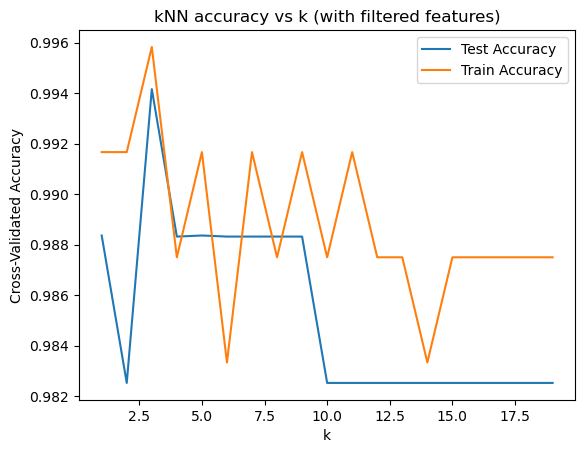

In [392]:
plt.plot(range(1, 20), test_scores, label="Test Accuracy")
plt.plot(range(1, 20), train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend();

In [409]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_opt, y_train)

KNeighborsClassifier(n_neighbors=3)

In [410]:
preds = knn.predict(X_test_opt)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        37

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



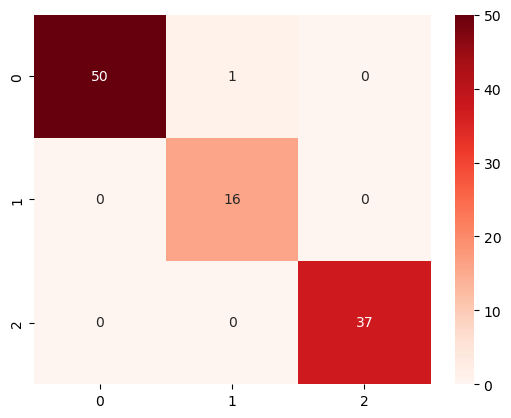

In [411]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Reds');